**This notebook is an exercise in the [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/parsing-dates).**

---


In this exercise, you'll apply what you learned in the **Parsing dates** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex3 import *
print("Setup Complete")

Setup Complete


# Get our environment set up

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset containing information on earthquakes that occured between 1965 and 2016.

In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

# 1) Check the data type of our date column

You'll be working with the "Date" column from the `earthquakes` dataframe.  Investigate this column now: does it look like it contains dates?  What is the dtype of the column?

In [9]:
# TODO: Your code here!
earthquakes.info()
# Dtype of date column is object (categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Once you have answered the question above, run the code cell below to get credit for your work.

# 2) Convert our date columns to datetime

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year".  However, the entry at index 3378 follows a completely different pattern.  Run the code cell below to see this.

In [ ]:
earthquakes[3378:3383]

This does appear to be an issue with data entry: ideally, all entries in the column have the same format.  We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.

In [ ]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

Looks like there are two more rows that has a date in a different format.  Run the code cell below to obtain the indices corresponding to those rows and print the data.

In [ ]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Given all of this information, it's your turn to create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it.  

**Note**: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns.  Do not remove any rows from the dataset.

In [ ]:
# TODO: Your code here
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

# 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [16]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
day_of_month_earthquakes

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: date_parsed, Length: 23412, dtype: int64

# 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

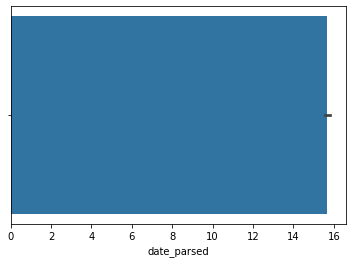

In [28]:
# TODO: Your code here!
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=day_of_month_earthquakes,data=earthquakes)
sns.scatterplot(x=day_of_month_earthquakes,data=earthquakes)
plt.show()

Does the graph make sense to you?

In [ ]:
With only one feature in this graph we could not derive much insigths from the graph.

# (Optional) Bonus Challenge

For an extra challenge, you'll work with a [Smithsonian dataset](https://www.kaggle.com/smithsonian/volcanic-eruptions) that documents Earth's volcanoes and their eruptive history over the past 10,000 years 

Run the next code cell to load the data.

In [18]:
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")
volcanos

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


Try parsing the column "Last Known Eruption" from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [19]:
volcanos['Last Known Eruption'].sample(5)

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object